# Warm Up: Machine Learning with a Heart

My Finish: Top 6% of 3,905 participants

Competition homepage: https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/

This project is my submission to a data science competition on DrivenData, a website devoted that data science projects to benefit the world. The purpose of this project is to built a prediction model that can predict heart disease in patients, based on 12 details in their medical history. We are using a small dataset of 180 patients, an extremely small amount of data to built a model that can predict heart disease for anyone in the United States. The use of external data is not allowed in this competition, so I am limited to using only the dataset provided to built a model.

# Data Loading and Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load in training data, training labels, test data, test labels

data = pd.read_csv('train_values.csv')
test = pd.read_csv('test_values.csv')

In [3]:
# save test patient ids to add back to test dataframe for submission

test_patient_ids = test['patient_id']

In [4]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [5]:
# load training labels

labels = pd.read_csv('train_labels.csv')

In [6]:
labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [7]:
data.shape

(180, 14)

In [8]:
# adding labels to dataframe 

data['labels'] = labels['heart_disease_present']

In [9]:
data.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
labels                                    int64
dtype: object

In [10]:
# searching for missing data
# there are none

null_values = data.isnull().sum()
null_columns = null_values[null_values > 0]
null_columns

Series([], dtype: int64)

# Data Exploration - Demographics

Now that all of my data is loaded and cleaned, I will plot some distributions of both sex and age, the only feature columns we have related to our patients' demographics. I want to make sure that my data represents a close representation of the United Staes, as this model needs to fit to anyone.

In [11]:
import seaborn as sns

sns.distplot(data['age'], axlabel = 'Age')

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


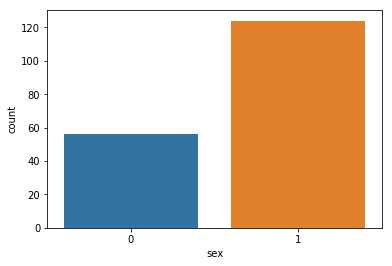

In [12]:
sns.countplot(x=data['sex'])

With 0 representing men and 1 representing women, we can see that this dataset has a much larger representation of females than males. I will leave this as is, although I would imagine that a dataset more evenly representative in this category would be a more accurate representation of the demographic of those getting tested for heart disease in the United States.

Another interesting observing of the training data is that there are a decent number of patients under the age of 40 included in this training set. I have a hunch that my model may become more accurate in this competition if I only included patients above the age of 40, as these are the ones most likely to get tested for heart disease.

# Feature Transformation

In [13]:
# defining a transform features function to create dummy columns from text variables, all columns should be numeric

def transform_features(data):
    data = data.copy()
    
    # dropping patient ids, this information is irrelevant for the model
    data = data.drop('patient_id', axis=1)
    
    # create dummy columns
    types = data.dtypes
    cat_cols = types[types==object].index
    dum_data = pd.get_dummies(data, prefix = cat_cols)
        
    return dum_data

In [14]:
# observing the the three new dummies columns are now included, the original object column was automatically deleted

transform_features(data).dtypes

slope_of_peak_exercise_st_segment         int64
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
labels                                    int64
thal_fixed_defect                         uint8
thal_normal                               uint8
thal_reversible_defect                    uint8
dtype: object

In [15]:
# transforming features for test and train
# datasets will have more features from creation of dummy columns

train_transformed = transform_features(data)
test_transformed = transform_features(test)

print(train_transformed.shape)
print(test_transformed.shape)

test_transformed.head(5)

(180, 16)
(90, 15)


,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_fixed_defect,thal_normal,thal_reversible_defect
0,2,170,1,0,0,2,288,0.2,1,59,159,0,0,0,1
1,1,138,4,0,0,0,183,1.4,0,35,182,0,0,1,0
2,2,120,4,0,0,2,177,2.5,1,43,120,1,0,0,1
3,1,102,3,1,0,0,318,0.0,0,60,160,0,0,1,0
4,2,138,4,1,0,2,166,3.6,1,61,125,1,0,1,0


# Feature Selection

In [16]:
# observing list of highest correlations

corrs = train_transformed.corr()
sorted_corrs = abs(corrs['labels']).sort_values(ascending=False)
strong_corrs = sorted_corrs[sorted_corrs > 0.1]
strong_corrs

labels                               1.000000
thal_normal                          0.528812
thal_reversible_defect               0.525145
exercise_induced_angina              0.448647
num_major_vessels                    0.421519
chest_pain_type                      0.412829
oldpeak_eq_st_depression             0.382930
max_heart_rate_achieved              0.375352
slope_of_peak_exercise_st_segment    0.344224
sex                                  0.335421
resting_ekg_results                  0.145933
age                                  0.138255
Name: labels, dtype: float64

The above is a list of the highest correlations of my feature columns to the labels column. By including just the most highly correlated columns, this can improve the model's accuracy on test data and avoid overfitting to my limited training data.

In [17]:
# create function for feature selection

def select_features(data, n=0.1):
    
    # first transforming features by passing data through transform_feature function created above
    data = transform_features(data)
    
    corrs = data.corr()
    sorted_corrs = abs(corrs['labels']).sort_values()
    strong_corrs = sorted_corrs[sorted_corrs > n]
    new_features = data[strong_corrs.index]
    
    return new_features

selected = select_features(data)

To test my hypothesis that this limited dataset has too large of a sample of ages below 50, whom I believe are less likely to get tested for heart disease, I will be created three new dataframes with the ages narrowed down. I will test all of these separately and see how well they perform in this competition.

In [18]:
## creating new dataframes with ages narrowed down to above 40, 45, and 50

above_40 = selected[selected['age'] > 40]
above_45 = selected[selected['age'] > 45]
above_50 = selected[selected['age'] > 50]

# Training and Testing with Logistic Classifier

In [19]:
# define a function to train and test my model

from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

# uses kfold for evaluation, default set to 4 folds
def train_and_test(data, model=LogisticRegression(solver='lbfgs', max_iter = 4000, C=1.2), k=4):
    shuffled = data.sample(frac=1, random_state=1)
    kf = KFold(n_splits=k)
    features = data.drop(['labels'], axis = 1).columns
    accuracies = []
    for train_index, test_index, in kf.split(shuffled):
        train = shuffled.iloc[train_index]
        test = shuffled.iloc[test_index]
        model.fit(train[features], train["labels"])
        probs = model.predict_proba(test[features])[:,1]
        log_losses = log_loss(test["labels"], probs)
        accuracies.append(log_losses)
    losses_avg = np.mean(accuracies)
    print('Average log loss across all folds is', losses_avg)
    return accuracies

train_and_test(selected)

Average log loss across all folds is 0.43612099478618643


[0.5361536207097976, 0.5843725188642488, 0.353539309714821, 0.2704185298558783]

In [20]:
# training and testing on the narrowed down age dataframes

# the log loss of dataframe above 40
train_and_test(above_40)

Average log loss across all folds is 0.42318087431152973


[0.489844838997181,
 0.46914092763712184,
 0.3412220606099416,
 0.39251567000187443]

In [21]:
# above 45
train_and_test(above_45)

Average log loss across all folds is 0.48236399924424034


[0.4220778141482791,
 0.601713977207525,
 0.42373558395044353,
 0.4819286216707136]

In [22]:
train_and_test(above_50)

Average log loss across all folds is 0.49182647450207134


[0.6842751429058334,
 0.4216036243925871,
 0.4512307741984137,
 0.4101963565114513]

## Conclusion

Upon testing my hypothesis that cutting out patients under the age of 40 will improve accuracy, this turned out to be correct on both my training dataset and the submission to the competition. I was inspired to try this from studying the idea of "stratified sampling" in statistics. When one has limited sampling data, sampling from categories proportional to the demographics of the population is often a useful technique to build a more accurate model.

By narrowing down my dataframe in this way, I improved my submission accuracy in the competition from the top 11% to finishing in the top 6% in the end. I realized that I could continue to narrow down my data to improve accuracy, however, I quickly realized that I would end up overfitting to the test data instead. Thus, I prefered to stick to the spirit of the purpose of this competition by keeping a generized model that is capable of working for anyone in the United States.

Furthermore, I have other notebooks trying out neural networks, XGBoost, decision trees, and other classifiers on this competition. In the end, a logistic classifier worked the best for me. My takeaway is that sometimes the tried and true methods superceed the new, shiny, and fancy ones.

# Final Predictions for Competition Submission

In [23]:
# redefine a train and test without kfolds

def train_and_test_final(data, test, model=LogisticRegression(solver='lbfgs', max_iter = 4000), k=4):
    shuffled = data.sample(frac=1, random_state=8)
    features = data.drop(['labels'], axis = 1).columns
    model.fit(shuffled[features], shuffled["labels"])
    test['heart_disease_present'] = model.predict_proba(test[features])[:,1]
    test['patient_id'] = test_patient_ids
    return test[['patient_id', 'heart_disease_present']]

# prediction with logistic classifier model
log_predictions = train_and_test_final(above_40, test_transformed)
log_predictions.head(10)

,patient_id,heart_disease_present
0,olalu7,0.184002
1,z9n6mx,0.065711
2,5k4413,0.933741
3,mrg7q5,0.061184
4,uki4do,0.937181
5,kev1sk,0.038243
6,9n6let,0.082605
7,jxmtyg,0.967708
8,51s2ff,0.149712
9,wi9mcs,0.116986


In [24]:
# saving to csv file

above_40_pred = train_and_test_final(above_40, test_transformed, model=LogisticRegression(solver='lbfgs', C=1.2, max_iter = 4000))
#above_40_pred.to_csv('above_40.csv', index=False)